# FBProphet

There are many models present for the predictive analysis of time series like Machine learning ARIMA (Auto-Regressive Integrated Moving Average model), Auto-Regressive model, Exponential Smoothing, LSTM (Long Short Term Memory).

These models require the data to be fed and with certain tweaking and fine-tuning they help us to make predictions. 

To Reduce these steps for converting non stationery into stationery we can use this model, for all fine tuning we can use this model.

This was launched by Facebook as an API for carrying out the forecasting related things for time series data. The library is powerful that it has the capability of handling stationarity within the data and also seasonality related components.

The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

It is a General Additive Model(GAM).

## Prophet

Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

Prophet time series = Trend + Seasonality + Holiday + error

Trend models non periodic changes in the value of the time series.

Seasonality is the periodic changes like daily, weekly, or yearly seasonality.

Holiday effect which occur on irregular schedules over a day or a period of days.

Error terms is what is not explained by the model.

## Advantages Of Prophet

Accommodates seasonality with multiple periods.

Prophet is resilient to missing values.

Best way to handle outliers in Prophet is to remove them.

Fitting of the model is fast.

Intuitive hyper parameters which are easy to tune.

### Installation

1. To install Fbprophet one must first install Pystan which is a library that helps in running Fbprophet with ease. To install Pystan just open you Command Prompt or Anaconda Prompt and then type:

pip install pystan

2. Once Pystan is successfully downloaded, the next step is to install Fbprophet either by pip or conda. Under the same Command Prompt just type:

pip install fbprophet

or

conda install -c conda-forge fbprophet

3. Once, the installation finishes and throws no error then you have successfully installed the packages and are ready for the implementation.

## Parameters Of Model

1. changepoint_prior_scale: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. Default is 0.05, a range of [0.001, 0.5] would likely be about right, often on log scale.


2. seasonality_prior_scale: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. It is for removing overfitting, This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.


3. holidays_prior_scale: This controls flexibility to fit holiday effects. Similar to seasonality_prior_scale, it defaults to 10.0 which applies basically no regularization, since we usually have multiple observations of holidays and can do a good job of estimating their effects. This could also be tuned on a range of [0.01, 10] as with seasonality_prior_scale.


4. seasonality_mode: Options are ['additive', 'multiplicative']. Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series (see the documentation here on multiplicative seasonality), but when that isn’t possible, it could be tuned.


5. growth: Options are ‘linear’ and ‘logistic’. This likely will not be tuned; if there is a known saturating point and growth towards that point it will be included and the logistic trend will be used, otherwise it will be linear.


6. n_changepoints: This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series (at least the type that Prophet would work well on anyway). Rather than increasing or decreasing the number of changepoints, it will likely be more effective to focus on increasing or decreasing the flexibility at those trend changes, which is done with changepoint_prior_scale.


7. yearly_seasonality: By default (‘auto’) this will turn yearly seasonality on if there is a year of data, and off otherwise. Options are [‘auto’, True, False]. If there is more than a year of data, rather than trying to turn this off during HPO, it will likely be more effective to leave it on and turn down seasonal effects by tuning seasonality_prior_scale.


8. holidays: This is to pass in a dataframe of specified holidays. The holiday effects would be tuned with holidays_prior_scale.

## Steps For Implementing

1. Load The Packages
2. Read Data
3. Plot The Data
4. Change Column Name as Date to ds and Output to y
5. Convert Date into DateTime Variable
6. Initialize The Model
7. Drop Null Values
8. Fit The Model
9. Create Future Dates
10. Prediction On Future Dates
11. Prediction Head
12. Plot Components
13. Use Cross Validation
14. Performance Matrix
15. Plot Performance Matrix

In [2]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers (1).csv


In [29]:
df=pd.read_csv('airline_passengers.csv')

In [30]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [31]:
df.drop(144,axis=0,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [33]:
df['Month'] = pd.to_datetime(df['Month'])

In [34]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


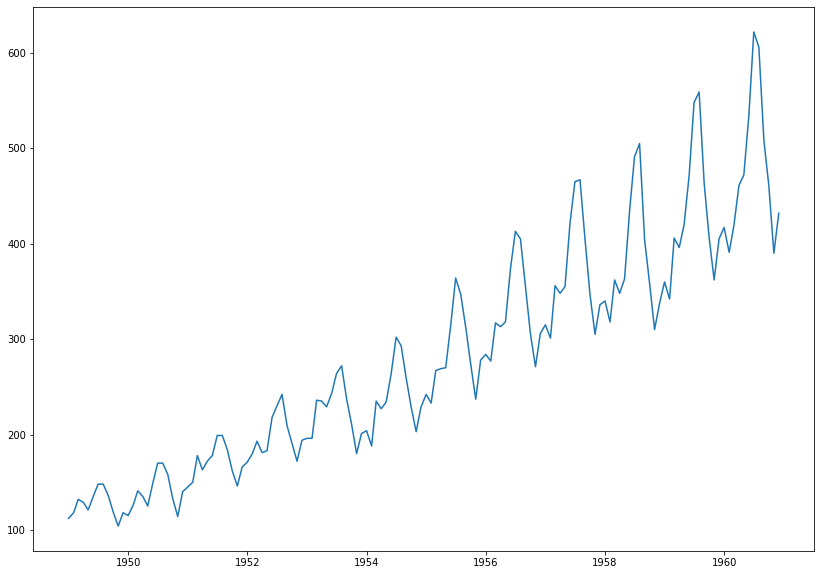

In [35]:
plt.figure(figsize=(14,10))
plt.plot(df.set_index(['ds']))

In [51]:
# Initialize the Model
model=Prophet()

In [52]:
df.columns

Index(['ds', 'y'], dtype='object')

In [38]:
df.dropna(axis=0,inplace=True)

In [53]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [55]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [56]:
prediction=model.predict(future_dates)

In [57]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,55.315087,114.314715,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,51.026057,106.060416,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,82.057959,137.649496,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.360350,136.159505,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,83.079221,138.461734,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [58]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.639276,467.077975,527.318123,520.084114,521.193495,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,-22.354203,0.0,0.0,0.0,498.285073
505,1961-11-28,520.739726,468.983287,524.282640,520.181178,521.296333,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,-23.984202,0.0,0.0,0.0,496.755524
506,1961-11-29,520.840176,464.929338,523.403715,520.277846,521.399612,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,-26.252105,0.0,0.0,0.0,494.588071
507,1961-11-30,520.940625,461.062056,521.861278,520.374514,521.502891,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,-29.113730,0.0,0.0,0.0,491.826895
508,1961-12-01,521.041075,457.632216,517.728072,520.471182,521.606170,-32.509534,-32.509534,-32.509534,-32.509534,-32.509534,-32.509534,0.0,0.0,0.0,488.531541


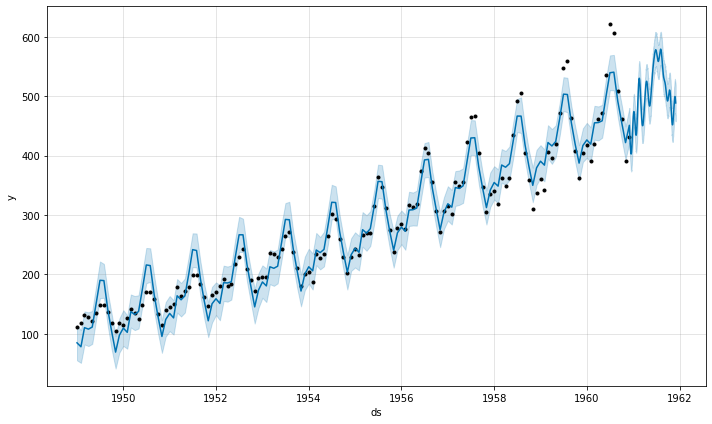

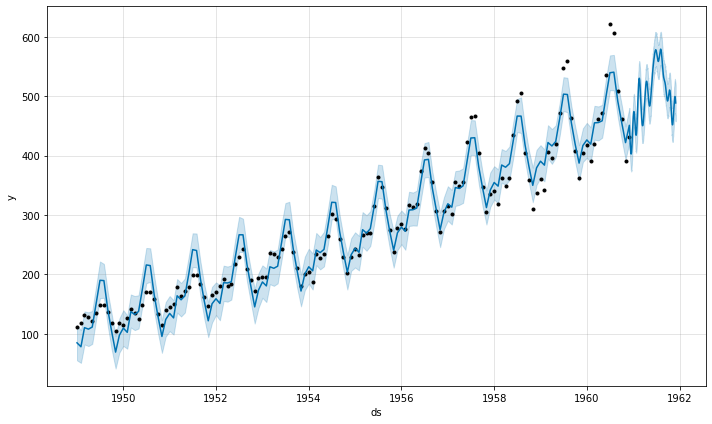

In [59]:
### plot the predicted projection
model.plot(prediction)

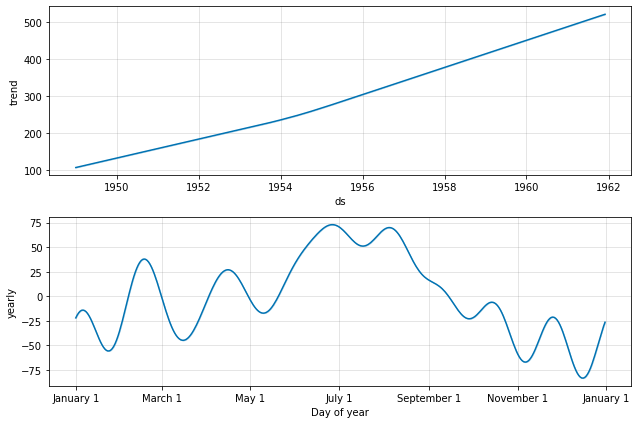

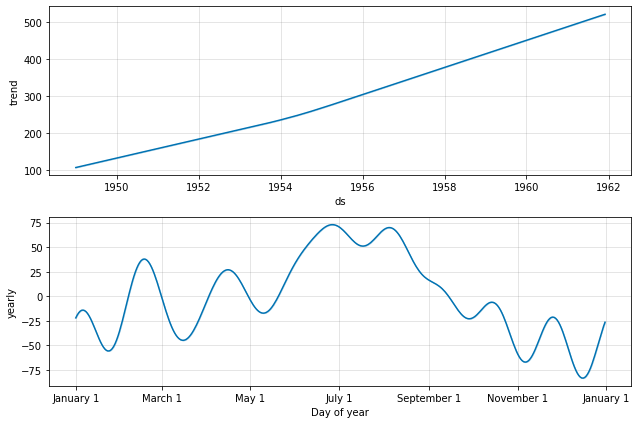

In [60]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

##### Example
Time Series Analysis

1960-1962
Cross Validation

1960-61---Train dataset

1961-62--Test dataset

1962-63---Validation

In [61]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.853198,158.223773,150.0,1951-01-18
1,1951-03-01,171.224502,170.578696,171.910986,178.0,1951-01-18
2,1951-04-01,159.628157,158.420424,161.008774,163.0,1951-01-18
3,1951-05-01,145.666500,143.659110,147.851860,172.0,1951-01-18
4,1951-06-01,180.679910,177.699174,183.800823,178.0,1951-01-18


In [48]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1964.365505,44.321163,32.878427,0.118416,0.088570,0.181818
1,42 days,2472.803375,49.727290,37.321363,0.144618,0.093214,0.136364
2,46 days,2547.242483,50.470214,39.103368,0.159599,0.094266,0.090909
3,47 days,1956.644577,44.233975,35.864557,0.126581,0.094266,0.090909
4,48 days,1947.129157,44.126286,35.438609,0.125261,0.094266,0.090909


In [62]:
df_p.head(20)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1964.365505,44.321163,32.878427,0.118416,0.088570,0.181818
1,42 days,2472.803375,49.727290,37.321363,0.144618,0.093214,0.136364
2,46 days,2547.242483,50.470214,39.103368,0.159599,0.094266,0.090909
3,47 days,1956.644577,44.233975,35.864557,0.126581,0.094266,0.090909
4,48 days,1947.129157,44.126286,35.438609,0.125261,0.094266,0.090909
5,51 days,2077.726927,45.582090,37.280822,0.130524,0.095993,0.090909
6,52 days,2071.382429,45.512443,37.253354,0.129897,0.095993,0.090909
7,53 days,2026.786768,45.019849,36.237603,0.127544,0.094266,0.090909
8,56 days,2079.458652,45.601082,36.964964,0.130045,0.102672,0.090909
9,57 days,2288.725409,47.840625,38.498589,0.130721,0.114386,0.090909


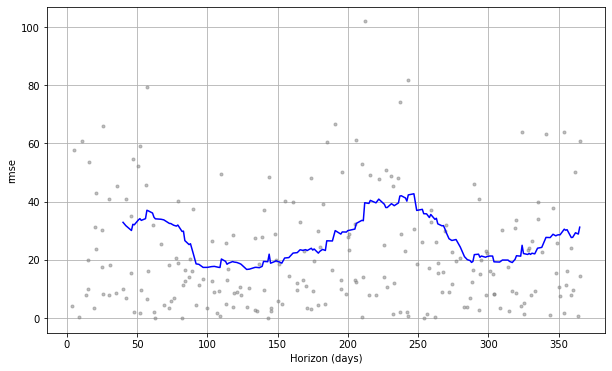

In [63]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Conclusion And Comparision With Other Models

In the Time Series Data the Major thing we need to handel is the Stationerity of data and the seasonal and cyclic component of time series data, with respect to a date format column or datatype as date column, in this open source model we just need to visualize the data and provide the parameters as per the visualization of the data.

Wheraeas, In other models like AR,MA,ARMA AND ARIMA we need to first find out if the data is stationery or not by some methods, if it is not stationery we need to convert it into stationery data by some methods after that for the parameters of p,d,q for implementing the models we need to use decomposition and ACF and PACF methods for finding approporiate value of them, then implement the model and predict for the best accuracy and best prediction by comparing the value from Mean Squared Error or any other scoring methods.

But in the FBProphect, we just need to provide the data in the format of date as 'ds' and output variable as y column and make predictions for further dates which are append on the data itself, then by cross validation check for the best predictions and best accuracy and can be helpful to predict easily for more number of dates.

The Equation of basic models are similar to that of Linear Regression as-:

Yt = β₁* yₜ-₁ + α₁* Ɛₜ-₁ + β₂* yₜ-₂ + α₂ * Ɛₜ-₂ + β₃ * yₜ-₃ + α₃ * Ɛₜ-₃ +………… + βₖ * yₜ-ₖ + αₖ * Ɛₜ-ₖ

where beta(β) is the coeff. of AR Model and alpha(α) is the coeff. of MA Model in each time lag, it tries to predict with help of adding the resdiuals and values in previous lags.

Whereas, the equation FBprophect is-:

y(t) = g(t) + s(t) + h(t) + e(t)

g(t)-: It is a trend function which helps in finding and handling trend functions that are non periodic changes in data.

s(t)-: It represents periodic changes weekly, monthly, yearly. An yearly seasonal component is modeled using Fourier series and weekly seasonal component using dummy variables.

h(t)-: It is a function that represents the effect of holidays which occur on irregular schedules.(n≥1 days)

e(t)-: represents error changes that are not accommodated by the model.

In [3]:
df=pd.read_excel(r"C:\Users\dell\Downloads\CGK analysis Origin & Destination.xlsx")

In [4]:
df.head()

,AWBSNo,Unnamed: 1,AWBNo,AccountTypeName,Origin,Destination,ProductName,CommodityCode,NatureOfGoods,SHC_EXE,...,FlightType,Sector,Pieces,GrossWeight,Volume.1,VolumeWeight,ChargeableWeight,FlightNo,FlightDate,ETD
0,1,NaN,111-1212121,FORWARDER,ICN,CGK,GENERAL,0,CONSOLIDATION,,...,Direct,ICN-CGK,2,31.0,0.054002,9.00,31.0,GA-0879,2020-02-02,10:35:00
1,2,NaN,111-1212122,FORWARDER,ICN,CGK,GENERAL,0,25KG OF ERDOSTEINE,EAP,...,Direct,ICN-CGK,1,28.0,0.084003,14.00,28.0,GA-0879,2020-02-02,10:35:00
2,3,NaN,111-1212123,FORWARDER,ICN,CGK,GENERAL,0,CONSOL,,...,Direct,ICN-CGK,27,794.0,2.864995,477.48,794.0,GA-0879,2020-02-02,10:35:00
3,4,NaN,111-1212124,FORWARDER,ICN,CGK,GENERAL,0,CONSOLIDATION,HEA,...,Direct,ICN-DPS,1,220.0,0.117005,19.50,220.0,GA-0871,2020-02-02,11:35:00
4,5,NaN,111-1212125,FORWARDER,ICN,CGK,GENERAL,0,CONSOLIDATION,HEA,...,Direct,DPS-CGK,1,220.0,0.117005,19.50,220.0,GA-0425,2020-02-02,21:20:00


In [6]:
df.groupby('ExecutionDate').sum()

,AWBSNo,Unnamed: 1,CommodityCode,AWBPieces,GrossWeightBKD,Volume,VolumeWeightBKD,ChargeableWeightBKD,Pieces,GrossWeight,Volume.1,VolumeWeight,ChargeableWeight
ExecutionDate,,,,,,,,,,,,,
2020-01-31,15,0.0,0,32,1293.0,3.237,539.5,1324.0,32,1293.00,3.237009,539.48,1293.00
2020-02-01,123789,0.0,3797392,2429,30054.6,107.225,17957.5,31526.5,2540,32685.75,130.302052,21716.14,34659.82
2020-02-02,6,0.0,0,9,35.0,0.144,24.0,45.0,9,35.00,0.144006,24.00,35.00
2020-02-03,213,0.0,4494,2,29.0,0.104,18.0,30.0,2,30.00,0.108004,18.00,30.00
2020-02-10,333,0.0,10003,5,50.0,0.300,50.0,10.0,1,10.00,0.060002,10.00,10.00
2020-02-26,394,0.0,10003,15,150.0,0.228,38.5,97.0,14,97.00,0.573023,95.50,97.00
